In [1]:
# Librerias necesarias
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_excel("../data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(541909, 8)
Tipo de variable de las columnas:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
Cantidad de valores nulos por columna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Descripción de los campos de tipo texto: palabra más corta, palabra más larga y número promedio de carácteres.

In [5]:
# Funcion para obtener la mayor y menor cantidad de carácteres y la cantidad promedio de carácteres
def LargoCadena(lista):
    # Acumuladores y registros para las variables a determinar
    _min = 0
    _palabraMin = ""
    _max = 0
    _palabraMax = ""
    _i = 0
    _suma = 0
    _promedio = 0
    
    for e in lista:
        if(e is not np.nan):# elemento no nulo
            elem = str(e)
            if(_i == 0):# Primer registro
                _min = len(elem.strip())
                _max = len(elem.strip())
                _palabraMin = elem.strip()
                _palabraMax = elem.strip()
                
            # Acumulador de sumas para calcular promedio posterior
            _suma = _suma + len(elem.strip())
            
            # Re asignacion para largos maximo y minimo 
            if(len(elem.strip()) < _min):
                _min = len(elem.strip())
                _palabraMin = elem.strip()
                
            if(len(elem.strip()) > _max):
                _max = len(elem.strip())
                _palabraMax = elem.strip()
            
            # Contador para el calculo de promedio
            _i = _i + 1
            
    # Calculo del promedio fuera del bucle for
    if(_i != 0):
        _promedio = _suma / _i
    else:
        _promedio = 0
    
    # Se muestra un breve reporte con la informacion
    print("====================================================================")
    print("Palabra más larga:")
    print(_palabraMax)
    print("Número de carácteres:")
    print(_max)
    print("====================================================================")
    print("Palabra más corta:")
    print(_palabraMin)
    print("Número de carácteres:")
    print(_min)
    print("====================================================================")
    print("Cantidad promedio de carácteres:")
    print(int(_promedio))
    print("Número de palabras evaluadas:")
    print(_i)

In [6]:
print("====================================================================")
print("VARIABLE: Description")
LargoCadena(df["Description"])
print("VARIABLE: Country")
LargoCadena(df["Country"])

VARIABLE: Description
Palabra más larga:
KNITTED UNION FLAG HOT WATER BOTTLE
Número de carácteres:
35
Palabra más corta:
?
Número de carácteres:
1
Cantidad promedio de carácteres:
26
Número de palabras evaluadas:
540455
VARIABLE: Country
Palabra más larga:
United Arab Emirates
Número de carácteres:
20
Palabra más corta:
USA
Número de carácteres:
3
Cantidad promedio de carácteres:
13
Número de palabras evaluadas:
541909


# Cantidad de nulos por cada variable

In [7]:
# Funcion para obtener la cantida de datos no nulos por cada columna
def NoNulos(campo):
    n = df.shape[0]
    nulos = df[campo].isnull().sum()
    return n - nulos

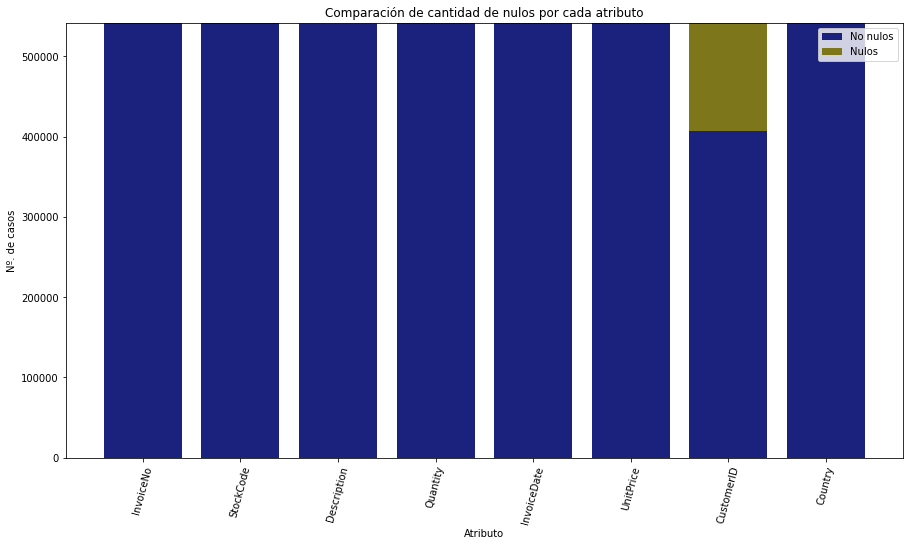

In [8]:
total_registros = df.shape[0]
data = [
    ["InvoiceNo", df["InvoiceNo"].isnull().sum(), NoNulos("InvoiceNo")],
    ["StockCode", df["StockCode"].isnull().sum(), NoNulos("StockCode")],
    ["Description", df["Description"].isnull().sum(), NoNulos("Description")],
    ["Quantity", df["Quantity"].isnull().sum(), NoNulos("Quantity")],
    ["InvoiceDate", df["InvoiceDate"].isnull().sum(), NoNulos("InvoiceDate")],
    ["UnitPrice", df["UnitPrice"].isnull().sum(), NoNulos("UnitPrice")],
    ["CustomerID", df["CustomerID"].isnull().sum(), NoNulos("CustomerID")],
    ["Country", df["Country"].isnull().sum(), NoNulos("Country")]
]
df2 = pd.DataFrame(data, columns = ["attribute", "null_count", "notnull_count"])
df2 = df2.set_index("attribute")

null_values = df2["null_count"]
not_nullvalues = df2["notnull_count"]

plt.figure(figsize=(15,8))
plt.bar(df2.index, not_nullvalues, label='No nulos', color= "#1a227e")
plt.bar(df2.index, null_values, color='#7e761a', label='Nulos', bottom=not_nullvalues)
plt.xlabel('Atributo')
plt.xticks(rotation = 75)
plt.ylabel('Nº. de casos')
plt.title('Comparación de cantidad de nulos por cada atributo')
plt.legend(loc = "best")
plt.show()

Se puede apreciar que el volumen de datos nulos no es tan elevado comparado con el total del dataset, por lo que se puede aplicar la eliminación de todos los nulos sin mayor problema.

In [3]:
#Se copian los datos a un dataset de copia
data = df.copy()
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
#borrar filas con missing
data_new = data.dropna()

In [5]:
data_new.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
print("===================================================================")
print("Tamaño del dataframe:")
print(data_new.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(data_new.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(data_new.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(406829, 8)
Tipo de variable de las columnas:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
Cantidad de valores nulos por columna:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Se convierten los tipos de variables que corresponden y se añaden algunas columnas para tener mayor información.

In [7]:
data_new['CustomerID'] = data_new['CustomerID'].astype("int64")
data_new['Description'] = data_new['Description'].astype("string")
data_new['Country'] = data_new['Country'].astype("string")

In [8]:
# Se agrega una columna para la cantidad gastada = cantidad por el precio unitario
data_new["Amount_Spent"] = data_new['Quantity'] * data_new['UnitPrice'] 

In [9]:
data_new = data_new[['InvoiceNo','InvoiceDate','StockCode','Description','Quantity','UnitPrice','Amount_Spent','CustomerID','Country']]
data_new.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [10]:
# Se separa la fecha en nuevas columnas para obtener con mayor detalle la data asociada
data_new["Month"] = data_new.InvoiceDate.dt.month
data_new["Year"] = data_new.InvoiceDate.dt.year
data_new["Quarter"] = data_new.InvoiceDate.dt.quarter
data_new["Semana"] = data_new.InvoiceDate.dt.week
data_new["DiaSemana"] = data_new.InvoiceDate.dt.weekday #lunes = 0
data_new["Dia"] = data_new.InvoiceDate.dt.day

data_new["Yearmonth"] = data_new['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
data_new['Hour'] = data_new['InvoiceDate'].apply(lambda x: x.strftime('%H'))
data_new['Weekday'] = data_new['InvoiceDate'].apply(lambda x: x.strftime('%w'))
data_new['Diasemana'] = data_new['InvoiceDate'].dt.day_name()
data_new.head()

<ipython-input-10-4bbcd9c70bf9>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_new["Semana"] = data_new.InvoiceDate.dt.week


,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country,Month,Year,Quarter,Semana,DiaSemana,Dia,yearmonth,hour,Weekday
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,12,2010,4,48,2,1,201012,08,3
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,12,2010,4,48,2,1,201012,08,3
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,12,2010,4,48,2,1,201012,08,3
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,12,2010,4,48,2,1,201012,08,3
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,12,2010,4,48,2,1,201012,08,3


In [11]:
df_copia = data_new
# Se crea el objeto que escribe el dataset
writer = pd.ExcelWriter('../data/Online_Retail_Limpia.xlsx')
# Se setea el data set sin los indices que atribuye pandas
df_copia.to_excel(writer, index=False)
# Se guarda el dataset en cuestion
writer.save()
print('Se ha exportado el excel.')

Se ha exportado el excel.
